## Letter Recognition - Capstone Project

Name: Anandu O A  
Org: Entri Elevate  
Date: 20/03/2025  

### Objective
The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15 (features). We train on the first 14000 items and then use the resulting model to predict the letter category for the remaining 6000.  

### Variable Info
     1.	lettr	capital letter	                (26 values from A to Z)  ( Target variable)
	 2.	x-box	horizontal position of box	    (integer)  
	 3.	y-box	vertical position of box	    (integer)  
	 4.	width	width of box			    (integer)  
	 5.	high 	height of box			    (integer)  
	 6.	onpix	total # on pixels		    (integer)  
	 7.	x-bar	mean x of on pixels in box	    (integer)  
	 8.	y-bar	mean y of on pixels in box	    (integer)  
	 9.	x2bar	mean x variance			    (integer)  
	10.	y2bar	mean y variance			    (integer)  
	11.	xybar	mean x y correlation		    (integer)  
	12.	x2ybr	mean of x * x * y		    (integer)  
	13.	xy2br	mean of x * y * y		    (integer)  
	14.	x-ege	mean edge count left to right	    (integer)  
	15.	xegvy	correlation of x-ege with y	    (integer)  
	16.	y-ege	mean edge count bottom to top	    (integer)  
	17.	yegvx	correlation of y-ege with x	    (integer)  

### Data source

Source: UCI Machine Learning Repository  
Dataset-link: https://archive.ics.uci.edu/dataset/59/letter+recognition

### Data Cleaning

#### Importing all the modules used in this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import joblib

#### loading the dataset

In [2]:
columns = ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

In [3]:
data = pd.read_csv('letter-recognition.data', names = columns)

In [4]:
df = pd.DataFrame(data = data)

#### display basic info

In [5]:
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [8]:
#unique letters in target variable

df['lettr'].nunique()

26

In [9]:
# renaming the column 'lettr' to 'Letter'

In [10]:
df = df.rename(columns = {'lettr': 'Letter'})

In [11]:
df.head()

,Letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


#### checking any missing values

In [12]:
df.isnull().sum()

Letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

In [13]:
# In this dataset we need not find any duplicate values

In [14]:
df['Letter'].value_counts()

Letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

## Exploratory Data Analysis

In [15]:
# Distribution of target variable

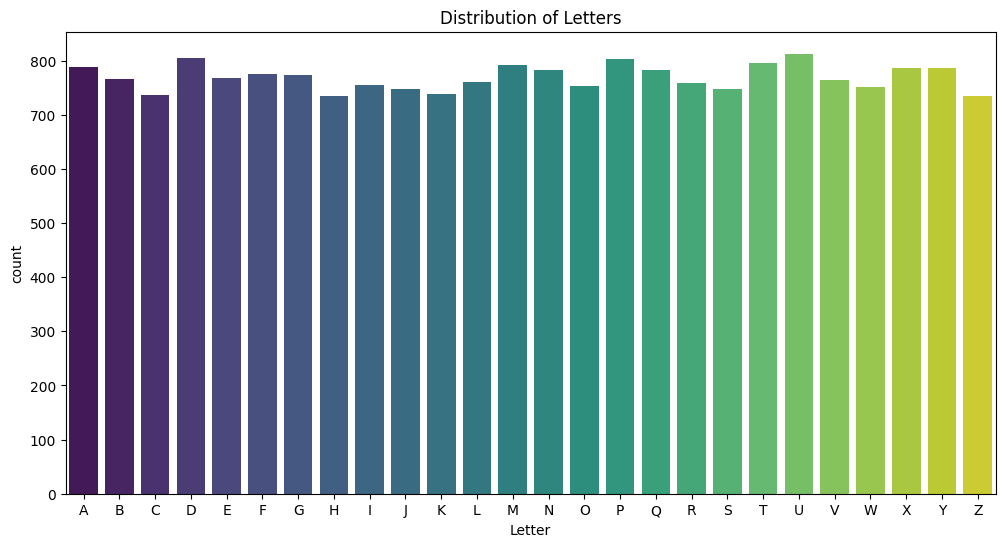

In [16]:
plt.figure(figsize = (12,6))
sns.countplot(x='Letter', data=df, order=sorted(df['Letter'].unique()), palette='viridis')
plt.title('Distribution of Letters')
plt.show()

In [17]:
# distribution of Numerical features

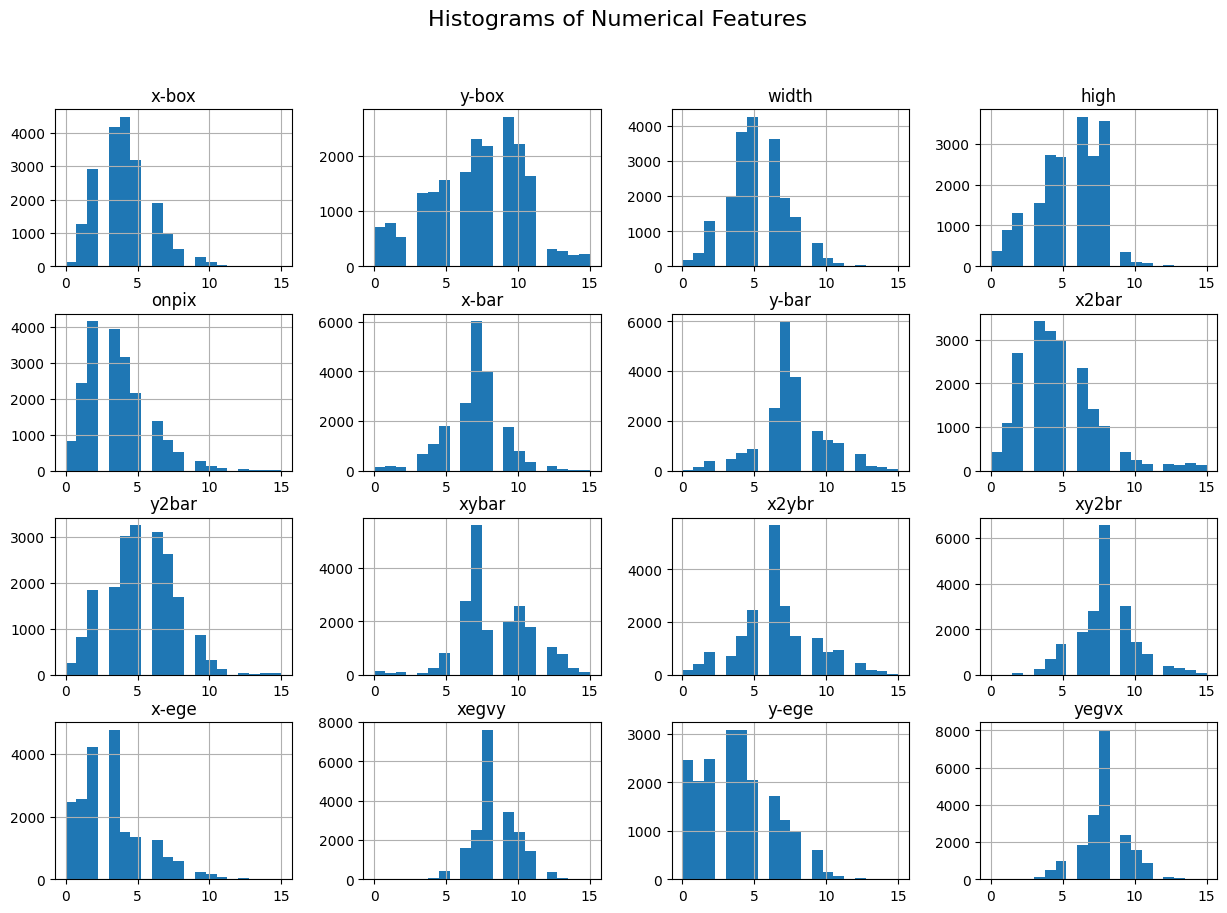

In [18]:
df.hist(bins = 20, figsize = (15,10))
plt.suptitle('Histograms of Numerical Features', fontsize = 16)
plt.show()

In [19]:
# we find the correlation matrix

In [20]:
corr = df.drop(columns = ['Letter']).corr()
corr

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
x-box,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
y-box,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
high,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
x-bar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
y-bar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


In [21]:
# plot the correlation matrix for better understanding

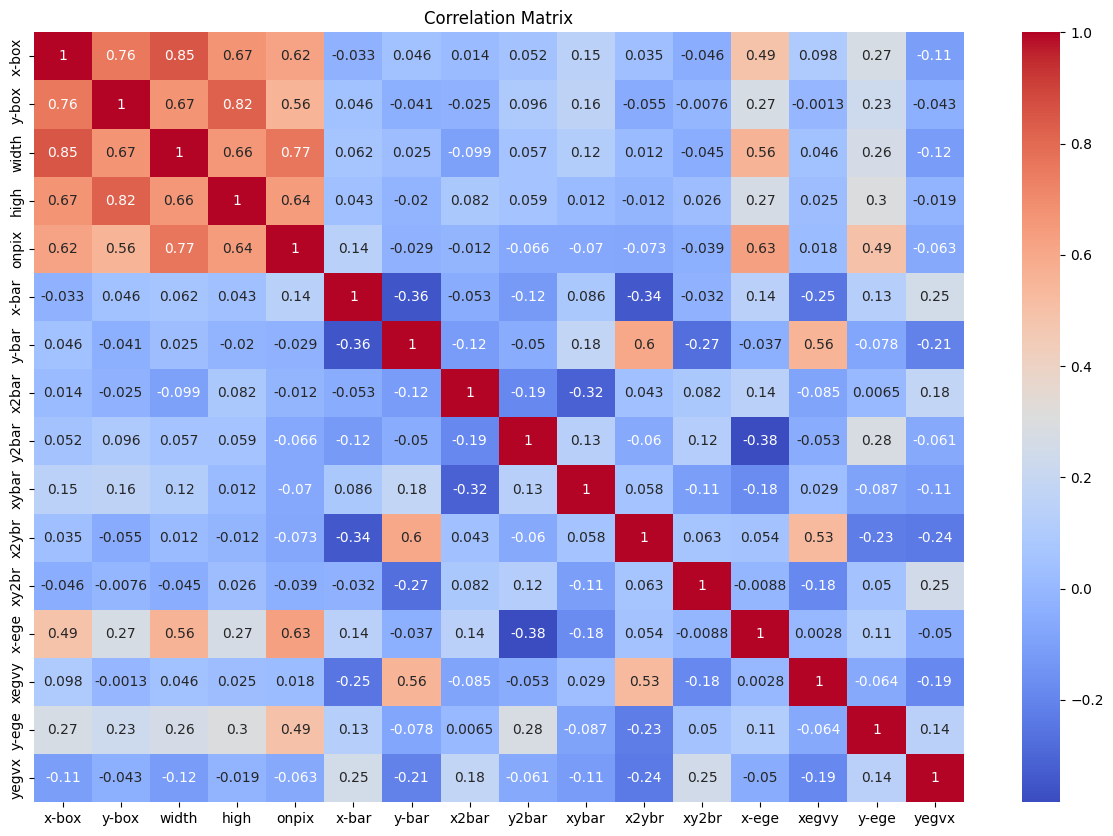

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data preprocessing

In [23]:
# Label encoding 

In [24]:
#encoding the target variable to numerical value

In [25]:
le = LabelEncoder()
df['Letter_encoded'] = le.fit_transform(df['Letter'])

In [26]:
# creating a new Dataframe with only the encoded letter feature

In [27]:
df1 = df.drop('Letter', axis=1)

In [28]:
df1.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Letter_encoded
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,19
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,8
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,3
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,13
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,6


In [29]:
# we will find the correlation matrix for finding the relation between independent and dependent variables

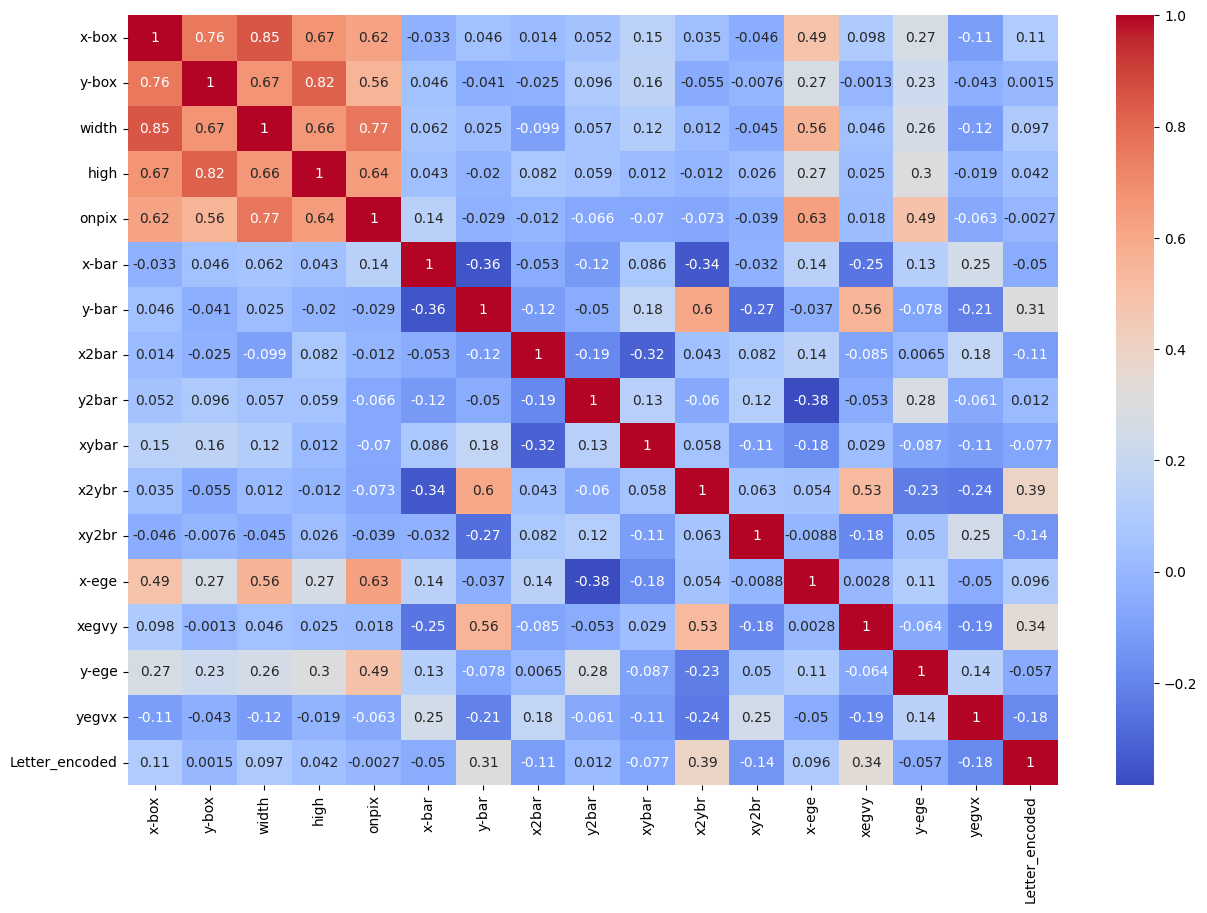

In [30]:
corr1 = df1.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr1, annot = True, cmap = 'coolwarm')
plt.show()

In [31]:
# Splitting the data

In [32]:
X = df1.drop('Letter_encoded', axis =1)
y = df1['Letter_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [33]:
# feature scaling

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
print(f"Shape of X_train: {X_train.shape}\nShape of X_test: {X_test.shape}\nShape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}")

Shape of X_train: (14000, 16)
Shape of X_test: (6000, 16)
Shape of y_train: (14000,)
Shape of y_test: (6000,)


## Model building and finding the best Model

In [36]:
# initialize the models

In [40]:
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000),
    'KNN Neighbours': KNeighborsClassifier(),
    'SVM': SVC(),
    'MLP': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [41]:
# Training the models

In [42]:
results = {}
print("Model Building starts:\n")
for name, model in models.items():
    print("Training {}".format(name))
    print("="*30)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # calculating the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average = 'macro')
    report  = classification_report(y_test, y_pred)

    #print metrics
    print("\nAccuracy score: ",accuracy)
    print("\nPrecision score: ", precision)
    print("\nRecall score: ", recall)
    print("\nF1 score: ", f1)
    print("\nClassification Report: ", report)

    #store in results dictionary
    results[name] = {
        'Accuracy' : accuracy,
        'Precision score' : precision,
        'Recall score' : recall,
        'F1 score': f1,
        'Classification Report': report
    }


Model Building starts:

Training Logistic Regression

Accuracy score:  0.7751666666666667

Precision score:  0.7721119271099133

Recall score:  0.7729535737771431

F1 score:  0.7713129117072965

Classification Report:                precision    recall  f1-score   support

           0       0.83      0.91      0.87       232
           1       0.69      0.76      0.72       229
           2       0.76      0.74      0.75       201
           3       0.77      0.81      0.79       250
           4       0.77      0.82      0.79       238
           5       0.76      0.80      0.78       211
           6       0.62      0.59      0.61       230
           7       0.54      0.40      0.46       218
           8       0.87      0.82      0.84       221
           9       0.80      0.79      0.79       228
          10       0.65      0.70      0.68       188
          11       0.85      0.81      0.83       231
          12       0.92      0.90      0.91       252
          13       0.84 

In [43]:
#finding the best model

In [44]:
best_model = max(results, key=lambda x: results[x]['Accuracy'])
best_model

'Random Forest'

In [45]:
print('Best Model to give max accuracy is : {}, with accuracy score of {}'.format(best_model,results[best_model]['Accuracy']))

Best Model to give max accuracy is : Random Forest, with accuracy score of 0.959


Best Model to give max accuracy is : Random Forest, with accuracy score of 0.959


In [46]:
#Hyper parameter Tuning in Random Forest model

In [47]:
# GridSearch was taking lot of time, so using RandomSearch

In [48]:
# Define parameter distribution
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

In [49]:
rf = RandomForestClassifier()

In [50]:
# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42,
    verbose=2
)

In [51]:
# Fit to data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027A0565D450>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027A059BFCE0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027A0565D1D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027A0345B8C0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [52]:
# Get best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

Best parameters: {'max_depth': 39, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 99}
Best cross-validation score: 0.9504


In [53]:
# Use the best model
best_rf = random_search.best_estimator_

In [54]:
best_rf

RandomForestClassifier(max_depth=39, max_features='log2', min_samples_split=5,
                       n_estimators=99)

In [55]:
# evaluate on the best model

In [56]:
y_pred_best = best_rf.predict(X_test)

In [57]:
 # calculating the metrics
accuracy_b = accuracy_score(y_test, y_pred_best)
precision_b = precision_score(y_test, y_pred_best, average='macro')
recall_b = recall_score(y_test, y_pred_best, average='macro')
f1_b = f1_score(y_test, y_pred_best, average = 'macro')
report_b  = classification_report(y_test, y_pred_best)
cm_b = confusion_matrix(y_test, y_pred_best)

In [58]:
#print metrics
print('Best Model to give max accuracy is : {}, with accuracy score of {}'.format(best_model,results[best_model]['Accuracy']))
print('Evaulation scores after Hypertuning are as follows:\n')
print("\nAccuracy score: ",accuracy_b)
print("\nPrecision score: ", precision_b)
print("\nRecall score: ", recall_b)
print("\nF1 score: ", f1_b)
print("\nClassification Report: ", report_b)
print("\nConfusion Matrix: \n",cm_b)

Best Model to give max accuracy is : Random Forest, with accuracy score of 0.959
Evaulation scores after Hypertuning are as follows:


Accuracy score:  0.9571666666666667

Precision score:  0.9574588740816184

Recall score:  0.9562631589447409

F1 score:  0.9564721564594214

Classification Report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99       232
           1       0.90      0.96      0.93       229
           2       0.98      0.93      0.95       201
           3       0.92      0.96      0.94       250
           4       0.94      0.97      0.95       238
           5       0.92      0.96      0.94       211
           6       0.96      0.95      0.96       230
           7       0.95      0.86      0.91       218
           8       0.96      0.90      0.93       221
           9       0.95      0.94      0.94       228
          10       0.92      0.92      0.92       188
          11       0.98      0.97      0.97       2

## Pipeline

In [62]:
#saving the model

In [63]:
joblib.dump(
    {'model': best_rf,
    'scaler': scaler,
    'label_encoder': le},
    'letter_recog_pipeline.pkl'
)

['letter_recog_pipeline.pkl']

In [64]:
print("Model saved successfully!")

Model saved successfully!


In [65]:
#load the saved pipeline

In [70]:
pipeline = joblib.load('letter_recog_pipeline.pkl')

In [71]:
#testing with unseen data

In [72]:
unseen_data = pd.read_csv('unseen.data', names = columns)

In [73]:
df_unseen = pd.DataFrame(data = unseen_data)

In [74]:
df_unseen.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [75]:
X_unseen = df_unseen.drop(columns = ['lettr'])

In [84]:
X_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x-box   20000 non-null  int64
 1   y-box   20000 non-null  int64
 2   width   20000 non-null  int64
 3   high    20000 non-null  int64
 4   onpix   20000 non-null  int64
 5   x-bar   20000 non-null  int64
 6   y-bar   20000 non-null  int64
 7   x2bar   20000 non-null  int64
 8   y2bar   20000 non-null  int64
 9   xybar   20000 non-null  int64
 10  x2ybr   20000 non-null  int64
 11  xy2br   20000 non-null  int64
 12  x-ege   20000 non-null  int64
 13  xegvy   20000 non-null  int64
 14  y-ege   20000 non-null  int64
 15  yegvx   20000 non-null  int64
dtypes: int64(16)
memory usage: 2.4 MB


In [76]:
#preprocessing

In [85]:
X_unseen_scaled = pipeline['scaler'].transform(X_unseen)

In [86]:
pipeline

{'model': RandomForestClassifier(max_depth=39, max_features='log2', min_samples_split=5,
                        n_estimators=99),
 'scaler': StandardScaler(),
 'label_encoder': LabelEncoder()}

In [87]:
#make predictions

In [88]:
predictions = pipeline['model'].predict(X_unseen_scaled)

In [89]:
predicted_letters = pipeline['label_encoder'].inverse_transform(predictions)

In [90]:
predictions

array([19,  8,  3, ..., 19, 18,  0], shape=(20000,))

In [91]:
predicted_letters

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], shape=(20000,), dtype=object)

In [92]:
#adding predicted letters back to the unseen data

In [93]:
new_df = df_unseen.copy()

In [94]:
new_df['Predicted_Letter'] = predicted_letters

In [95]:
new_df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Predicted_Letter
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,D
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,C
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,T
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,S


In [97]:
new_df.to_csv("predicted_results.csv", index=False)

In [99]:
print("Predictions saved to \"predicted_results.csv\".")

Predictions saved to "predicted_results.csv".


## Project completed